### Project Team:
##### Kanteti Kavya Vishnu (<KANT0006@e.ntu.edu.sg>)
##### Kee Jun Xi, Ansel (<AKEE004@e.ntu.edu.sg>)
##### Koh Hui Hsin Jacie (<JKOH123@e.ntu.edu.sg>)
##### Lee Yan Chak (<YLEE155@e.ntu.edu.sg>)
##### Leong Yi Zhi, Michael (<YLEONG030@e.ntu.edu.sg>)

## Task
##### We are tasked to develop an application to organize students into teams of size 5 or x (dependent on user input) for a data science mini-project while striving for balanced and diverse team compositions, with an even distribution of schools, gender and CGPA.
##### As it was not specified within the brief, we took an even distribution of CGPA to mean that the average CGPA of the group does not differ too much from each other.
##### We were given a csv file with 6000 student records with their tutorial group, student ID, name, school, gender and CGPA.

## Problem Decomposition (WIP)
##### 4 major parts to the task
##### 1. Reading & storing of student data in the given csv
##### 2. Grouping the data appropriately (i.e. according to tutorial groups)
##### 3. Sorting and assigning the students to team project groups based on their school, gender and CGPA
##### 4. Exporting the final results to a new csv file

## Flow Diagram
##### A quick general overview of how the code works
![diagram](assets/FlowDiagramBlack.png)

#### Importing MatPlot Library
##### Used for visualisation of factors specified, to ensure fairness and diversity.

In [ ]:
%pip install matplotlib
import matplotlib.pyplot as plt
'''
1. brief introduction along with team members name and email
2. problem decomposition processes
3. analyzing the data given
4. planning and designing the algorithm with flow charts or pseudocodes
5. implementation using modularized components
6. evaluating the algorithm
7. challenges and issues
8. conclusion.
'''


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


'\n1. brief introduction along with team members name and email\n2. problem decomposition processes\n3. analyzing the data given\n4. planning and designing the algorithm with flow charts or pseudocodes\n5. implementation using modularized components\n6. evaluating the algorithm\n7. challenges and issues\n8. conclusion.\n'

#### Open & read csv file
We first load the student data and then group them by their tutorial groups by reading the data from the .csv file and organising it into a dictionary where each key represents a tutorial group. We then analysed the data to calculate the average CGPA, ratio of male and female students, and the number of unique schools for each tutorial group. This will give us an idea of how each project group should roughly look – since each project group should look roughly representative of demographics of the tutorial group.


In [10]:
def read_file(filename):  
    data = []
    # Read and append .csv data to the list
    with open(filename) as file:
        for line in file:
            data.append(line.strip().split(","))
    return data

mega_data = read_file("records.csv")

In [11]:
def extract(data):
    # Extract header and data rows from the .csv
    header = data[0]
    rows = data[1:]

    # Group data by tutorial group
    grouped_data = {}
    for row in rows:
        tutorial_group = row[0]
        if tutorial_group not in grouped_data:
            grouped_data[tutorial_group] = []
        grouped_data[tutorial_group].append(row)

    # Display grouped data (check that previous code was executed correctly)
    for group, members in grouped_data.items():
        print(f"\nTutorial Group: {group}")
        print(header)
        for member in members:
            print(member)
    return header, grouped_data

header, grouped_data = extract(mega_data)


Tutorial Group: G-1
['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA']
['G-1', '5002', 'CCDS', 'Aarav Singh', 'Male', '4.02']
['G-1', '3838', 'EEE', 'Aarti Nair', 'Female', '4.05']
['G-1', '2091', 'EEE', 'Adlan Bin Rahman', 'Male', '4.2']
['G-1', '288', 'CoB (NBS)', 'Ajay Verma', 'Male', '4.01']
['G-1', '4479', 'CCDS', 'Amelia Kim', 'Female', '4.11']
['G-1', '5708', 'SoH', 'Ananya Ramesh', 'Male', '4.2']
['G-1', '4563', 'WKW SCI', 'Anjali Patel', 'Female', '4.01']
['G-1', '3989', 'WKW SCI', 'Anthony Liu', 'Male', '4.15']
['G-1', '2115', 'EEE', 'Anya Kumar', 'Female', '4.03']
['G-1', '1383', 'CoB (NBS)', 'Areeba Khan', 'Female', '4.19']
['G-1', '1417', 'CoE', 'Darren Lee', 'Male', '4.12']
['G-1', '1075', 'CoB (NBS)', 'Felix Yip', 'Male', '4.08']
['G-1', '3148', 'EEE', 'Gabriel Young', 'Male', '3.88']
['G-1', '4402', 'CCDS', 'Grace Turner', 'Female', '4.08']
['G-1', '945', 'MAE', 'Han Li', 'Female', '4.1']
['G-1', '2230', 'CoB (NBS)', 'Harlow Wang', 'Female', '4.18']
[

In [12]:
# Finding out the representative diversity of each tutorial group, by obtaining:
# 1. Average CGPA
# 2. Gender distribution
# 3. School diversity

# This function takes in the list of all students in the tutorial group as a 2D array,
# Returns and prints 1. mean GPA, 2. gender ratio, and 3. number of schools as a dictionary
def analyze_tutorial_groups(data):
    analysis = {}

    # Process each row
    for row in data:
        tutorial_group = row[0]
        gender = row[4]
        cgpa = float(row[5])
        school = row[2]

        # Initialise group statistics if new tutorial group
        if tutorial_group not in analysis:
            analysis[tutorial_group] = {
                'total_cgpa': 0.0,
                'num_students': 0,
                'male_count': 0,
                'female_count': 0,
                'schools': [],
                'students': []
            }

        # Update analysis dictionary for each data row
        analysis[tutorial_group]['total_cgpa'] += cgpa
        analysis[tutorial_group]['num_students'] += 1

        # Append eveery new school to keep track of all unique schools
        if school not in analysis[tutorial_group]['schools']:
            analysis[tutorial_group]['schools'].append(school)

        # Track the gender diversity of tutorial group
        if gender.lower() == 'male':
            analysis[tutorial_group]['male_count'] += 1
        elif gender.lower() == 'female':
            analysis[tutorial_group]['female_count'] += 1

        # Append student information to the students list
        analysis[tutorial_group]['students'].append(row)

    # Calculate and print analysis results for each tutorial group
    for group, stats in analysis.items():
        mean_cgpa = stats['total_cgpa'] / stats['num_students']
        gender_ratio = f"{stats['male_count']}:{stats['female_count']}"
        num_schools = len(stats['schools'])

        # Print these results
        print(f"\nTutorial Group: {group}")
        print(f"Mean CGPA: {mean_cgpa:.2f}")
        print(f"Gender Ratio (Male:Female): {gender_ratio}")
        print(f"Number of Schools: {num_schools}")

    return analysis

In [13]:
# Check the grouped data by tutorial group from the second code cell
print(grouped_data)

{'G-1': [['G-1', '5002', 'CCDS', 'Aarav Singh', 'Male', '4.02'], ['G-1', '3838', 'EEE', 'Aarti Nair', 'Female', '4.05'], ['G-1', '2091', 'EEE', 'Adlan Bin Rahman', 'Male', '4.2'], ['G-1', '288', 'CoB (NBS)', 'Ajay Verma', 'Male', '4.01'], ['G-1', '4479', 'CCDS', 'Amelia Kim', 'Female', '4.11'], ['G-1', '5708', 'SoH', 'Ananya Ramesh', 'Male', '4.2'], ['G-1', '4563', 'WKW SCI', 'Anjali Patel', 'Female', '4.01'], ['G-1', '3989', 'WKW SCI', 'Anthony Liu', 'Male', '4.15'], ['G-1', '2115', 'EEE', 'Anya Kumar', 'Female', '4.03'], ['G-1', '1383', 'CoB (NBS)', 'Areeba Khan', 'Female', '4.19'], ['G-1', '1417', 'CoE', 'Darren Lee', 'Male', '4.12'], ['G-1', '1075', 'CoB (NBS)', 'Felix Yip', 'Male', '4.08'], ['G-1', '3148', 'EEE', 'Gabriel Young', 'Male', '3.88'], ['G-1', '4402', 'CCDS', 'Grace Turner', 'Female', '4.08'], ['G-1', '945', 'MAE', 'Han Li', 'Female', '4.1'], ['G-1', '2230', 'CoB (NBS)', 'Harlow Wang', 'Female', '4.18'], ['G-1', '4520', 'EEE', 'Henry Foster', 'Male', '4.11'], ['G-1', '5

In [14]:
# Output the summary statistics from analysis results
for key in grouped_data:
    analyze_tutorial_groups(grouped_data[key])


Tutorial Group: G-1
Mean CGPA: 4.10
Gender Ratio (Male:Female): 21:29
Number of Schools: 15

Tutorial Group: G-10
Mean CGPA: 4.12
Gender Ratio (Male:Female): 26:24
Number of Schools: 17

Tutorial Group: G-100
Mean CGPA: 4.09
Gender Ratio (Male:Female): 22:28
Number of Schools: 17

Tutorial Group: G-101
Mean CGPA: 4.11
Gender Ratio (Male:Female): 25:25
Number of Schools: 15

Tutorial Group: G-102
Mean CGPA: 4.10
Gender Ratio (Male:Female): 22:28
Number of Schools: 15

Tutorial Group: G-103
Mean CGPA: 4.10
Gender Ratio (Male:Female): 25:25
Number of Schools: 16

Tutorial Group: G-104
Mean CGPA: 4.07
Gender Ratio (Male:Female): 20:30
Number of Schools: 14

Tutorial Group: G-105
Mean CGPA: 4.09
Gender Ratio (Male:Female): 24:26
Number of Schools: 16

Tutorial Group: G-106
Mean CGPA: 4.08
Gender Ratio (Male:Female): 24:26
Number of Schools: 13

Tutorial Group: G-107
Mean CGPA: 4.07
Gender Ratio (Male:Female): 19:31
Number of Schools: 14

Tutorial Group: G-108
Mean CGPA: 4.08
Gender Ratio (

In [15]:
# Step to verify content in grouped data by tutorial group
print(grouped_data["G-1"])

[['G-1', '5002', 'CCDS', 'Aarav Singh', 'Male', '4.02'], ['G-1', '3838', 'EEE', 'Aarti Nair', 'Female', '4.05'], ['G-1', '2091', 'EEE', 'Adlan Bin Rahman', 'Male', '4.2'], ['G-1', '288', 'CoB (NBS)', 'Ajay Verma', 'Male', '4.01'], ['G-1', '4479', 'CCDS', 'Amelia Kim', 'Female', '4.11'], ['G-1', '5708', 'SoH', 'Ananya Ramesh', 'Male', '4.2'], ['G-1', '4563', 'WKW SCI', 'Anjali Patel', 'Female', '4.01'], ['G-1', '3989', 'WKW SCI', 'Anthony Liu', 'Male', '4.15'], ['G-1', '2115', 'EEE', 'Anya Kumar', 'Female', '4.03'], ['G-1', '1383', 'CoB (NBS)', 'Areeba Khan', 'Female', '4.19'], ['G-1', '1417', 'CoE', 'Darren Lee', 'Male', '4.12'], ['G-1', '1075', 'CoB (NBS)', 'Felix Yip', 'Male', '4.08'], ['G-1', '3148', 'EEE', 'Gabriel Young', 'Male', '3.88'], ['G-1', '4402', 'CCDS', 'Grace Turner', 'Female', '4.08'], ['G-1', '945', 'MAE', 'Han Li', 'Female', '4.1'], ['G-1', '2230', 'CoB (NBS)', 'Harlow Wang', 'Female', '4.18'], ['G-1', '4520', 'EEE', 'Henry Foster', 'Male', '4.11'], ['G-1', '567', 'Co

## Basic Group Creation
The create_project_groups_balanced() function forms project groups by first analysing data from tutorial groups. It iterates through each tutorial group, sorting students by their CGPA in descending order to ensure a balance in academic performance within each group. The function then uses criteria to form groups with balanced gender ratios and diverse school representation.

The process works as follows:
Students are sorted by CGPA and gender, with the highest CGPA students selected first.
The function attempts to create groups up to a predefined size. Each group is constructed by checking gender and number of schools before adding a student.
Once a group is formed, the function calculates the group’s mean CGPA, gender ratio, and the number of distinct schools represented. These metrics are used to evaluate the diversity and balance within the group.
The function prints a summary of each group, detailing the mean CGPA, gender ratio, and the number of schools.

While this approach ensures a reasonable level of diversity, it doesn’t explicitly optimise groups to reflect the overall tutorial group statistics (average CGPA, gender distribution, and number of schools), leading to potentially varied group compositions. This leads us to our more optimised processes below.


In [16]:
# Create as diverse as possible project groups within each tutorial group, based on project group's:
# 1. Average CGPA
# 2. Gender distribution
# 3. School diversity

# Function to create diverse project groups
def create_project_groups_balanced(data, group_size=5):
    # Analyze the data to group students by tutorial group
    tutorial_data = analyze_tutorial_groups(data)
    # Initialise dictionary to store summary information about each project group
    project_groups_summary = {}

    for tutorial_group, stats in tutorial_data.items():
        # Iterate over each tutorial group and retrieve list of students for current one
        students = stats['students']
        
        # Sort students by descending CGPA to ensure balance
        students = sorted(students, key=lambda x: (float(x[5]), x[4]), reverse=True)
        
        # Initialise list to store project groups
        project_groups_summary[tutorial_group] = []
        
        # Form project groups
        while students:
            current_group = []
            unique_schools = set()
            male_count = 0
            female_count = 0

            # Form groups of up to 'group_size' students
            while len(current_group) < group_size and students:
                student = None
                best_fit_index = -1

                for i, candidate in enumerate(students):
                    gender = candidate[4].lower()
                    school = candidate[2]

                    # Check criteria for gender balance and school diversity
                    if (
                        (male_count < group_size // 2 or gender == 'female') and
                        (female_count < group_size // 2 or gender == 'male') and
                        school not in unique_schools
                    ):
                        student = candidate
                        best_fit_index = i
                        break

                if student:
                    current_group.append(student)
                    students.pop(best_fit_index)
                    unique_schools.add(student[2])
                    if student[4].lower() == 'male':
                        male_count += 1
                    elif student[4].lower() == 'female':
                        female_count += 1
                else:
                    # Add the next available student if no criteria met
                    current_group.append(students.pop(0))

            # Calculate analysis results for each project group (provided its not empty)
            if current_group:
                total_cgpa = sum(float(student[5]) for student in current_group)
                male_count = sum(1 for student in current_group if student[4].lower() == 'male')
                female_count = sum(1 for student in current_group if student[4].lower() == 'female')
                schools = list(set(student[2] for student in current_group))

                mean_cgpa = total_cgpa / len(current_group)
                gender_ratio = f"{male_count}:{female_count}"
                num_schools = len(schools)

                # Append the analysis results to the summary
                project_groups_summary[tutorial_group].append({
                    'mean_cgpa': mean_cgpa,
                    'gender_ratio': gender_ratio,
                    'num_schools': num_schools,
                    'students': current_group
                })

                # Print summary for each project group
                print(f"\nMini Group {len(project_groups_summary[tutorial_group])} in Tutorial Group {tutorial_group}:")
                print(f"Mean CGPA: {mean_cgpa:.2f}")
                print(f"Gender Ratio (Male:Female): {gender_ratio}")
                print(f"Number of Schools: {num_schools}")

    return project_groups_summary

In [17]:
# Check to make sure function works as planned
create_project_groups_balanced(grouped_data["G-1"])


Tutorial Group: G-1
Mean CGPA: 4.10
Gender Ratio (Male:Female): 21:29
Number of Schools: 15

Mini Group 1 in Tutorial Group G-1:
Mean CGPA: 4.33
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Mini Group 2 in Tutorial Group G-1:
Mean CGPA: 4.19
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Mini Group 3 in Tutorial Group G-1:
Mean CGPA: 4.16
Gender Ratio (Male:Female): 2:3
Number of Schools: 4

Mini Group 4 in Tutorial Group G-1:
Mean CGPA: 4.13
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Mini Group 5 in Tutorial Group G-1:
Mean CGPA: 4.10
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Mini Group 6 in Tutorial Group G-1:
Mean CGPA: 4.07
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Mini Group 7 in Tutorial Group G-1:
Mean CGPA: 4.05
Gender Ratio (Male:Female): 2:3
Number of Schools: 4

Mini Group 8 in Tutorial Group G-1:
Mean CGPA: 4.02
Gender Ratio (Male:Female): 2:3
Number of Schools: 4

Mini Group 9 in Tutorial Group G-1:
Mean CGPA: 4.00
Gender

{'G-1': [{'mean_cgpa': 4.332,
   'gender_ratio': '2:3',
   'num_schools': 5,
   'students': [['G-1', '3861', 'ASE', 'Layla Torres', 'Female', '4.52'],
    ['G-1', '2069', 'SSS', 'Kathy Lau', 'Female', '4.48'],
    ['G-1', '2091', 'EEE', 'Adlan Bin Rahman', 'Male', '4.2'],
    ['G-1', '5708', 'SoH', 'Ananya Ramesh', 'Male', '4.2'],
    ['G-1', '809', 'CoB (NBS)', 'Nisha Das', 'Female', '4.26']]},
  {'mean_cgpa': 4.186,
   'gender_ratio': '2:3',
   'num_schools': 5,
   'students': [['G-1', '4820', 'CoE', 'Meera Singh', 'Female', '4.22'],
    ['G-1', '4338', 'SPMS', 'Sana Jain', 'Female', '4.22'],
    ['G-1', '3989', 'WKW SCI', 'Anthony Liu', 'Male', '4.15'],
    ['G-1', '2776', 'CCEB', 'Siddharth Nair', 'Male', '4.14'],
    ['G-1', '659', 'SSS', 'Maria Ivanovna', 'Female', '4.2']]},
  {'mean_cgpa': 4.16,
   'gender_ratio': '2:3',
   'num_schools': 4,
   'students': [['G-1', '1383', 'CoB (NBS)', 'Areeba Khan', 'Female', '4.19'],
    ['G-1', '71', 'SoH', 'Savannah Taylor', 'Female', '4.19'

## Optimised Group Creation
To address the limitations of the basic approach, the create_project_groups_optimized() function incorporates a more sophisticated method to minimise deviation from a tutorial group’s overall characteristics. This optimization aims to form project groups that closely reflect the diversity of the entire tutorial group in terms of CGPA, gender distribution, and school diversity.

The process in create_project_groups_optimized() involves:
The function begins by calculating the overall statistics for each tutorial group.
A helper function, calculate_cost(), then computes a "cost" representing the difference between a group’s characteristics and the overall tutorial group’s characteristics. The cost is calculated as the sum of squared differences in mean CGPA, gender counts, and the number of schools.
For each group, the function then evaluates every potential student based on the increase in cost if they were added to the group. The student with the lowest cost increment is chosen, ensuring that each addition minimises the deviation from the desired characteristics.
The process continues until all students are assigned to groups. If there are leftover students, another function, redistribute_leftover_students(), places them into existing groups while aiming to minimise disruption to the balance.


In [18]:
# Since the most diverse project group would be representative of the diveristy of its tutorial group,
# Compute "cost" that reflects how much a project group’s composition deviates from overall tutorial group's characteristics
# The lower the cost, the better the project group sorting

def calculate_cost(group_stats, overall_stats):
    # Calculate the cost as the sum of squared differences between group and overall stats
    cost = 0
    cost += (group_stats['mean_cgpa'] - overall_stats['mean_cgpa']) ** 2
    cost += (group_stats['male_count'] - overall_stats['male_count']) ** 2
    cost += (group_stats['female_count'] - overall_stats['female_count']) ** 2
    cost += (len(group_stats['schools']) - len(overall_stats['schools'])) ** 2
    return cost

In [19]:
def create_project_groups_optimized(data, group_size=5):
    # This is basically a greedy cost optimisation;
    # Within each tutorial group, aim to minimize deviation from desired characteristics:
    # 1. Average CGPA, 2. gender balance and 3. school diversity

    # Analyze the data to get each tutorial group's statistics
    tutorial_data = analyze_tutorial_groups(data)
    # Disctionary to store summary of project groups for each tutorial group
    project_groups_summary = {}

    # Process tutorial groups independently
    for tutorial_group, stats in tutorial_data.items():
        # Extract students and calculate overall stats for comparison
        students = stats['students']
        overall_mean_cgpa = stats['total_cgpa'] / stats['num_students']
        overall_stats = {
            'mean_cgpa': overall_mean_cgpa,
            'male_count': stats['male_count'] / stats['num_students'],
            'female_count': stats['female_count'] / stats['num_students'],
            'schools': stats['schools']
        }

        # Initialize list to store all project groups for the current tutorial group
        project_groups_summary[tutorial_group] = []

        # Track students already in project groups to prevent duplication
        used_students = set()

        # Form project groups until all students assigned
        while len(used_students) < len(students):
            current_group = []
            current_group_stats = {
                'total_cgpa': 0.0,
                'male_count': 0,
                'female_count': 0,
                'schools': set(),
                'num_students': 0
            }

            # Try to fill the current project group up to specified group size
            for _ in range(group_size):
                best_student = None
                best_student_index = -1
                # Set the minimum cost to infinity initially to ensure that any candidate
                # with a lower cost is selected
                min_cost = float('inf')

                # Iterate through each student in the tutorial group to find best candidate
                # to add to current project group based on optimization criteria
                for i, student in enumerate(students):
                    # Skip students already in project groups
                    if i in used_students:
                        continue

                    # Temporarily add current student to group and calculate new stats
                    # to see if adding would minimizes deviation from desired group characteristics
                    temp_group = current_group + [student]
                    temp_group_stats = {
                        'mean_cgpa': (current_group_stats['total_cgpa'] + float(student[5])) / len(temp_group),
                        'male_count': current_group_stats['male_count'] + (1 if student[4].lower() == 'male' else 0),
                        'female_count': current_group_stats['female_count'] + (1 if student[4].lower() == 'female' else 0),
                        'schools': current_group_stats['schools'] | {student[2]}
                    }

                    # Normalize counts to proportions for gender ratio comparison
                    temp_group_stats['male_count'] /= group_size
                    temp_group_stats['female_count'] /= group_size

                    # Calculate cost
                    cost = calculate_cost(temp_group_stats, overall_stats)

                    # If calculated cost is lowest so far, change best_student to current candidate
                    if cost < min_cost:
                        min_cost = cost
                        best_student = student
                        best_student_index = i

                # If best_student found, finalize their addition to the current group
                if best_student:
                    current_group.append(best_student)
                    used_students.add(best_student_index)
                    current_group_stats['total_cgpa'] += float(best_student[5])
                    current_group_stats['male_count'] += (1 if best_student[4].lower() == 'male' else 0)
                    current_group_stats['female_count'] += (1 if best_student[4].lower() == 'female' else 0)
                    current_group_stats['schools'].add(best_student[2])
                    current_group_stats['num_students'] += 1

            # Finalize the statistics (analysis results) of the current group
            mean_cgpa = current_group_stats['total_cgpa'] / current_group_stats['num_students']
            gender_ratio = f"{current_group_stats['male_count']}:{current_group_stats['female_count']}"
            num_schools = len(current_group_stats['schools'])

            # Append the analysis results to the summary
            project_groups_summary[tutorial_group].append({
                'mean_cgpa': mean_cgpa,
                'gender_ratio': gender_ratio,
                'num_schools': num_schools,
                'students': current_group
            })

            # Print summary for each project group
            print(f"\nProject Group {len(project_groups_summary[tutorial_group])} in Tutorial Group {tutorial_group}:")
            print(f"Mean CGPA: {mean_cgpa:.2f}")
            print(f"Gender Ratio (Male:Female): {gender_ratio}")
            print(f"Number of Schools: {num_schools}")

    return project_groups_summary

In [20]:
# Check to make sure function works as planned
create_project_groups_optimized(grouped_data["G-1"])


Tutorial Group: G-1
Mean CGPA: 4.10
Gender Ratio (Male:Female): 21:29
Number of Schools: 15

Project Group 1 in Tutorial Group G-1:
Mean CGPA: 4.09
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Project Group 2 in Tutorial Group G-1:
Mean CGPA: 4.09
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Project Group 3 in Tutorial Group G-1:
Mean CGPA: 4.08
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Project Group 4 in Tutorial Group G-1:
Mean CGPA: 4.08
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Project Group 5 in Tutorial Group G-1:
Mean CGPA: 4.11
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Project Group 6 in Tutorial Group G-1:
Mean CGPA: 4.08
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Project Group 7 in Tutorial Group G-1:
Mean CGPA: 4.12
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Project Group 8 in Tutorial Group G-1:
Mean CGPA: 4.12
Gender Ratio (Male:Female): 2:3
Number of Schools: 5

Project Group 9 in Tutorial Group 

{'G-1': [{'mean_cgpa': 4.093999999999999,
   'gender_ratio': '2:3',
   'num_schools': 5,
   'students': [['G-1', '945', 'MAE', 'Han Li', 'Female', '4.1'],
    ['G-1', '2818', 'CoB (NBS)', 'Oliver Tan', 'Male', '4.09'],
    ['G-1', '2650', 'SoH', 'Nurul Shafika', 'Female', '4.09'],
    ['G-1', '4520', 'EEE', 'Henry Foster', 'Male', '4.11'],
    ['G-1', '4402', 'CCDS', 'Grace Turner', 'Female', '4.08']]},
  {'mean_cgpa': 4.0920000000000005,
   'gender_ratio': '2:3',
   'num_schools': 5,
   'students': [['G-1', '4479', 'CCDS', 'Amelia Kim', 'Female', '4.11'],
    ['G-1', '1075', 'CoB (NBS)', 'Felix Yip', 'Male', '4.08'],
    ['G-1', '592', 'MSE', 'Zara Chang', 'Female', '4.11'],
    ['G-1', '5477', 'SoH', 'Vikram Desai', 'Male', '4.09'],
    ['G-1', '162', 'SSS', 'Lila Patel', 'Female', '4.07']]},
  {'mean_cgpa': 4.0840000000000005,
   'gender_ratio': '2:3',
   'num_schools': 5,
   'students': [['G-1', '5703', 'SPMS', 'Karen Lee', 'Female', '4.12'],
    ['G-1', '588', 'MAE', 'Lucas Walker

Roughly what this function does:
Iterates through leftover students not grouped during the optimised sorting.
Checks all current project groups to look for the best fit based on minimum cost increase.
Adds the student to the group and recalculates group statistics.



In [21]:
# This is for any potential ungrouped students to be integrated in least disruptive manner
# Least deviation from desired group characteristics (more specifically group size)

def redistribute_leftover_students(project_groups_summary, leftover_students, overall_stats, group_size):
    for student in leftover_students:
        min_cost_increase = float('inf')
        chosen_group = None
        chosen_tutorial_group = None

        # Iterate over all tutorial groups and their project groups to find the best slot
        for tutorial_group, project_groups in project_groups_summary.items():
            for group in project_groups:
                # Allow group size to exceed by only 1
                if len(group['students']) > group_size:
                    continue

                # Create a temporary group with the new student added
                temp_group = group['students'] + [student]
                total_cgpa = sum(float(s[5]) for s in temp_group)
                male_count = sum(1 for s in temp_group if s[4].lower() == 'male')
                female_count = sum(1 for s in temp_group if s[4].lower() == 'female')
                schools = set(s[2] for s in temp_group)

                # Update temporary group statistics
                temp_group_stats = {
                    'mean_cgpa': total_cgpa / len(temp_group),
                    'male_count': male_count / len(temp_group),
                    'female_count': female_count / len(temp_group),
                    'schools': schools
                }

                # Calculate the cost increase
                cost_increase = calculate_cost(temp_group_stats, overall_stats)

                # Choose the group with the minimal cost increase
                if cost_increase < min_cost_increase:
                    min_cost_increase = cost_increase
                    chosen_group = group
                    chosen_tutorial_group = tutorial_group

        # Add the student to the chosen group if a suitable group was found
        if chosen_group:
            chosen_group['students'].append(student)

            # Recalculate group statistics (analysis results) after adding the student
            chosen_group['mean_cgpa'] = sum(float(s[5]) for s in chosen_group['students']) / len(chosen_group['students'])
            male_count = sum(1 for s in chosen_group['students'] if s[4].lower() == 'male')
            female_count = sum(1 for s in chosen_group['students'] if s[4].lower() == 'female')
            chosen_group['gender_ratio'] = f"{male_count}:{female_count}"
            chosen_group['num_schools'] = len(set(s[2] for s in chosen_group['students']))

    return project_groups_summary

## Bonus Section: Group Creation with Custom Size
We now allow for the user of the code to specify the size of the project groups and form groups while minimising the deviation from the tutorial group characteristics (average CGPA, gender distribution, and school diversity).

The function first analyses the data for each tutorial group to obtain overall statistics and store them in a dictionary called overall_stats, which will be used to compare and optimise the project groups formed. The function then initialises an empty dictionary, project_groups_summary, to store the final project groups for each tutorial group. A set called used_students keeps track of students already assigned to project groups to avoid duplication, and the leftover_students list temporarily holds students who cannot be immediately grouped.

The function will continue to form project groups as long as there are still ungrouped students.
For each potential group, the function:
Initialises a new project group and their corresponding statistics (current_group_stats) to track their average CGPA, gender distribution, school diversity, and the number of students.
The function then iteratively adds students to the group using greedy cost-minimisation:
For each ungrouped student, it calculates a "cost" using the calculate_cost() function to determine how adding that student would affect the group's current composition, or how it affects the project group’s deviation from the tutorial group’s statistics, overall_stats.
The student with the lowest calculated cost is selected and added to the group.
If a group cannot be completely filled to the specified size, students are added to leftover_students for later redistribution.
Complete groups will then have their final statistics calculated and appended to project_groups_summary.

After all possible complete groups are formed, the function calls redistribute_leftover_students() to distribute leftover students into existing project groups with minimal cost. It's the same function from above.

Finally, the function returns project_groups_summary, which is a dictionary containing all project groups for every tutorial group. Each project group’s detailed statistics on their mean CGPA, gender distribution, and the number of schools are also stored here.

We also have code blocks here and there that call functions to test their functionality and check expected output, so maybe describe those as we’re going through the code.


In [22]:
# Bonus section: allow project groups to be created for any specified group size

def create_project_groups_optimized_any_size(data, group_size):
    # Analyze the data to get tutorial group statistics
    tutorial_data = analyze_tutorial_groups(data)
    # Dictionary to store summary of project groups created for each tutorial group
    project_groups_summary = {}

    # Iterate over each tutorial group to form project groups independently
    for tutorial_group, stats in tutorial_data.items():
        # Extract students and calculate overall statistics (analysis results) for comparison
        students = stats['students']
        overall_mean_cgpa = stats['total_cgpa'] / stats['num_students']
        overall_stats = {
            'mean_cgpa': overall_mean_cgpa,
            'male_count': stats['male_count'] / stats['num_students'],
            'female_count': stats['female_count'] / stats['num_students'],
            'schools': stats['schools']
        }

        # Initialize empty list to store finalized project groups for current tutorial group
        project_groups_summary[tutorial_group] = []
        # Track students already in project groups to prevent duplication
        used_students = set()
        # List to temporarily hold students if they cannot form complete group
        leftover_students = []
        
        # Continue forming groups until all students have been assigned
        while len(used_students) < len(students):
            # Initialize new project group + track stats
            current_group = []
            current_group_stats = {
                'total_cgpa': 0.0,
                'male_count': 0,
                'female_count': 0,
                'schools': set(),
                'num_students': 0
            }

            # Try to fill the current project group up to specified group size
            for _ in range(min(group_size, len(students) - len(used_students))):
                best_student = None
                best_student_index = -1
                # Set the minimum cost to infinity initially to ensure that any candidate
                # with a lower cost is selected
                min_cost = float('inf')

                # Find best match to group
                for i, student in enumerate(students):
                    # Skipping students already in groups
                    if i in used_students:
                        continue

                    # Create a temporary group with the new student added
                    temp_group = current_group + [student]
                    # Update temporary group statistics
                    temp_group_stats = {
                        'mean_cgpa': (current_group_stats['total_cgpa'] + float(student[5])) / len(temp_group),
                        'male_count': current_group_stats['male_count'] + (1 if student[4].lower() == 'male' else 0),
                        'female_count': current_group_stats['female_count'] + (1 if student[4].lower() == 'female' else 0),
                        'schools': current_group_stats['schools'] | {student[2]}
                    }

                    # Normalize counts to proportions for gender ratio comparison
                    temp_group_stats['male_count'] /= group_size
                    temp_group_stats['female_count'] /= group_size

                    # Calculate cost
                    cost = calculate_cost(temp_group_stats, overall_stats)

                    # Select student as potential addition if cost is lowest so far
                    if cost < min_cost:
                        min_cost = cost
                        best_student = student
                        best_student_index = i

                # If a suitable student is found, add them to the current group
                if best_student:
                    current_group.append(best_student)
                    used_students.add(best_student_index)
                    # Update new group stats
                    current_group_stats['total_cgpa'] += float(best_student[5])
                    current_group_stats['male_count'] += (1 if best_student[4].lower() == 'male' else 0)
                    current_group_stats['female_count'] += (1 if best_student[4].lower() == 'female' else 0)
                    current_group_stats['schools'].add(best_student[2])
                    current_group_stats['num_students'] += 1

            # Handle incomplete groups by adding students to leftover_students for later redistribution
            if len(current_group) < group_size:
                leftover_students.extend(current_group)
            # Calculate the project group's final statistics (analysis results)
            else:
                mean_cgpa = current_group_stats['total_cgpa'] / current_group_stats['num_students']
                gender_ratio = f"{current_group_stats['male_count']}:{current_group_stats['female_count']}"
                num_schools = len(current_group_stats['schools'])

                # Append the analysis results to the summary
                project_groups_summary[tutorial_group].append({
                    'mean_cgpa': mean_cgpa,
                    'gender_ratio': gender_ratio,
                    'num_schools': num_schools,
                    'students': current_group
                })

                # Print summary for each project group
                # print(f"\nProject Group {len(project_groups_summary[tutorial_group])} in Tutorial Group {tutorial_group}:")
                # print(f"Mean CGPA: {mean_cgpa:.2f}")
                # print(f"Gender Ratio (Male:Female): {gender_ratio}")
                # print(f"Number of Schools: {num_schools}")

        # Redistribute leftover students (using function defined in code cell 9)
        if leftover_students:
            # print(leftover_students)
            project_groups_summary = redistribute_leftover_students(project_groups_summary, leftover_students, overall_stats, group_size)

    return project_groups_summary

In [23]:
# Check to make sure function works as planned
create_project_groups_optimized_any_size(grouped_data["G-1"],4)


Tutorial Group: G-1
Mean CGPA: 4.10
Gender Ratio (Male:Female): 21:29
Number of Schools: 15


{'G-1': [{'mean_cgpa': 4.054,
   'gender_ratio': '2:3',
   'num_schools': 5,
   'students': [['G-1', '945', 'MAE', 'Han Li', 'Female', '4.1'],
    ['G-1', '2818', 'CoB (NBS)', 'Oliver Tan', 'Male', '4.09'],
    ['G-1', '2650', 'SoH', 'Nurul Shafika', 'Female', '4.09'],
    ['G-1', '4520', 'EEE', 'Henry Foster', 'Male', '4.11'],
    ['G-1', '2417', 'SSS', 'Truong Minh Chau', 'Female', '3.88']]},
  {'mean_cgpa': 4.0975,
   'gender_ratio': '2:2',
   'num_schools': 4,
   'students': [['G-1', '4479', 'CCDS', 'Amelia Kim', 'Female', '4.11'],
    ['G-1', '1075', 'CoB (NBS)', 'Felix Yip', 'Male', '4.08'],
    ['G-1', '592', 'MSE', 'Zara Chang', 'Female', '4.11'],
    ['G-1', '5477', 'SoH', 'Vikram Desai', 'Male', '4.09']]},
  {'mean_cgpa': 4.0975,
   'gender_ratio': '2:2',
   'num_schools': 4,
   'students': [['G-1', '4402', 'CCDS', 'Grace Turner', 'Female', '4.08'],
    ['G-1', '1417', 'CoE', 'Darren Lee', 'Male', '4.12'],
    ['G-1', '162', 'SSS', 'Lila Patel', 'Female', '4.07'],
    ['G-1',

In [24]:
# Input custom project group size
group_size = input("Input group size:\t")
output = dict()
for key in grouped_data:
    sorted = create_project_groups_optimized_any_size(grouped_data[key],int(group_size))
    output.update(sorted)


Tutorial Group: G-1
Mean CGPA: 4.10
Gender Ratio (Male:Female): 21:29
Number of Schools: 15

Tutorial Group: G-10
Mean CGPA: 4.12
Gender Ratio (Male:Female): 26:24
Number of Schools: 17

Tutorial Group: G-100
Mean CGPA: 4.09
Gender Ratio (Male:Female): 22:28
Number of Schools: 17

Tutorial Group: G-101
Mean CGPA: 4.11
Gender Ratio (Male:Female): 25:25
Number of Schools: 15

Tutorial Group: G-102
Mean CGPA: 4.10
Gender Ratio (Male:Female): 22:28
Number of Schools: 15

Tutorial Group: G-103
Mean CGPA: 4.10
Gender Ratio (Male:Female): 25:25
Number of Schools: 16

Tutorial Group: G-104
Mean CGPA: 4.07
Gender Ratio (Male:Female): 20:30
Number of Schools: 14

Tutorial Group: G-105
Mean CGPA: 4.09
Gender Ratio (Male:Female): 24:26
Number of Schools: 16

Tutorial Group: G-106
Mean CGPA: 4.08
Gender Ratio (Male:Female): 24:26
Number of Schools: 13

Tutorial Group: G-107
Mean CGPA: 4.07
Gender Ratio (Male:Female): 19:31
Number of Schools: 14

Tutorial Group: G-108
Mean CGPA: 4.08
Gender Ratio (

In [25]:
def analyze_generated_groups(grouped_data):
    # Dictionary to store analysis results for each tutorial group and its groups
    analysis_results = {}
    # Iterate through each tutorial group in the project groups
    for tutorial, groups in grouped_data.items():
        tutorial_analysis = []

        # Process each project group in the tutorial group
        for idx, group in enumerate(groups):
            total_gpa = 0.0
            gender_counts = {'Male': 0, 'Female': 0}
            school_counts = {}

            # Process each student in the project group
            for student in group:
                # Sum up GPA
                total_gpa += float(student[5])

                # Update gender count
                gender = student[4]
                if gender in gender_counts:
                    gender_counts[gender] += 1
                # Handles unexpected gender values (if any)
                else:
                    gender_counts[gender] = 1

                # Count school distribution
                school = student[2]
                if school in school_counts:
                    school_counts[school] += 1
                else:
                    school_counts[school] = 1

            # Calculate mean GPA
            mean_gpa = total_gpa / len(group) if group else 0
            sd = (sum((float(student[5])-mean_gpa)**2 for student in group) / len(group))**0.5

            # Gender ratio
            total_students = len(group)
            gender_ratio = {gender: count / total_students for gender, count in gender_counts.items()}

            # Store the analysis for the current project group
            group_analysis = {
                "group_number": idx + 1,
                "mean_gpa": mean_gpa,
                "sd": sd,
                "gender_ratio": gender_ratio,
                "school_distribution": len(school_counts)
            }

            # Append project group analysis to the tutorial analysis list
            tutorial_analysis.append(group_analysis)

        # Store the analysis for the entire tutorial group
        analysis_results[tutorial] = tutorial_analysis
    
    return analysis_results

In [26]:
final = dict((tut, [i["students"] for i in data]) for (tut, data) in output.items())
analyze_generated_groups(final)


{'G-1': [{'group_number': 1,
   'mean_gpa': 4.093999999999999,
   'sd': 0.010198039027185631,
   'gender_ratio': {'Male': 0.4, 'Female': 0.6},
   'school_distribution': 5},
  {'group_number': 2,
   'mean_gpa': 4.0920000000000005,
   'sd': 0.01600000000000006,
   'gender_ratio': {'Male': 0.4, 'Female': 0.6},
   'school_distribution': 5},
  {'group_number': 3,
   'mean_gpa': 4.0840000000000005,
   'sd': 0.043174066289846,
   'gender_ratio': {'Male': 0.4, 'Female': 0.6},
   'school_distribution': 5},
  {'group_number': 4,
   'mean_gpa': 4.082,
   'sd': 0.060464865831323725,
   'gender_ratio': {'Male': 0.4, 'Female': 0.6},
   'school_distribution': 5},
  {'group_number': 5,
   'mean_gpa': 4.112,
   'sd': 0.07194442299441968,
   'gender_ratio': {'Male': 0.4, 'Female': 0.6},
   'school_distribution': 5},
  {'group_number': 6,
   'mean_gpa': 4.08,
   'sd': 0.06723094525588673,
   'gender_ratio': {'Male': 0.4, 'Female': 0.6},
   'school_distribution': 5},
  {'group_number': 7,
   'mean_gpa': 4

Finally, we export the processed data into a file, taking the 3D list that is the value of the Tutorial groups key.
Each list is of the form, in order:
1. Tutorial Group
2. Mini-Project Group
3. Student details

In [27]:
print(final)

{'G-1': [[['G-1', '945', 'MAE', 'Han Li', 'Female', '4.1'], ['G-1', '2818', 'CoB (NBS)', 'Oliver Tan', 'Male', '4.09'], ['G-1', '2650', 'SoH', 'Nurul Shafika', 'Female', '4.09'], ['G-1', '4520', 'EEE', 'Henry Foster', 'Male', '4.11'], ['G-1', '4402', 'CCDS', 'Grace Turner', 'Female', '4.08']], [['G-1', '4479', 'CCDS', 'Amelia Kim', 'Female', '4.11'], ['G-1', '1075', 'CoB (NBS)', 'Felix Yip', 'Male', '4.08'], ['G-1', '592', 'MSE', 'Zara Chang', 'Female', '4.11'], ['G-1', '5477', 'SoH', 'Vikram Desai', 'Male', '4.09'], ['G-1', '162', 'SSS', 'Lila Patel', 'Female', '4.07']], [['G-1', '5703', 'SPMS', 'Karen Lee', 'Female', '4.12'], ['G-1', '588', 'MAE', 'Lucas Walker', 'Male', '4.06'], ['G-1', '3838', 'EEE', 'Aarti Nair', 'Female', '4.05'], ['G-1', '3989', 'WKW SCI', 'Anthony Liu', 'Male', '4.15'], ['G-1', '5119', 'ADM', 'Nhung Vu', 'Female', '4.04']], [['G-1', '1555', 'MAE', 'Prerna Gupta', 'Female', '4.04'], ['G-1', '2776', 'CCEB', 'Siddharth Nair', 'Male', '4.14'], ['G-1', '1271', 'SSS'

In [28]:
def export(data, filename, header):
    with open(filename, "w") as f:
        f.write(header)
        for tut, groups in data.items():
            for group in range(1, len(groups)+1):
                for student in groups[group-1]:
                    f.write(",".join(student)+","+str(group)+"\n")

In [29]:
# Export csv with the naming convention: <LabGroup>_<TeamNumber>_<LeaderName>.ipynb
export(final, "FCS7_Team3_KohHuiHsinJacie.csv", ",".join(header)+",Team Assigned\n")

In [30]:
visualisation_data = analyze_generated_groups(dict((tut, [i["students"] for i in data]) for (tut, data) in output.items()))

#### Visualisation Analysis Section
##### Plots the School Affiliation, Gender and CGPA, verifying that the groups within a user-specified tutorial group is indeed fair and diverse.

In [31]:
# Repeatedly prompts the user for the tutorial group to be plotted
while True:
    tutorial_group_to_plot = input("Which tutorial group would you like to visualise? (e.g. G-1, G-98) ")
    
    # Checks that tutorial group provided exists in the data
    if tutorial_group_to_plot in visualisation_data:
        break

#### Plotting Function
##### Uses MatPlotLib to create 3 separate graphs.

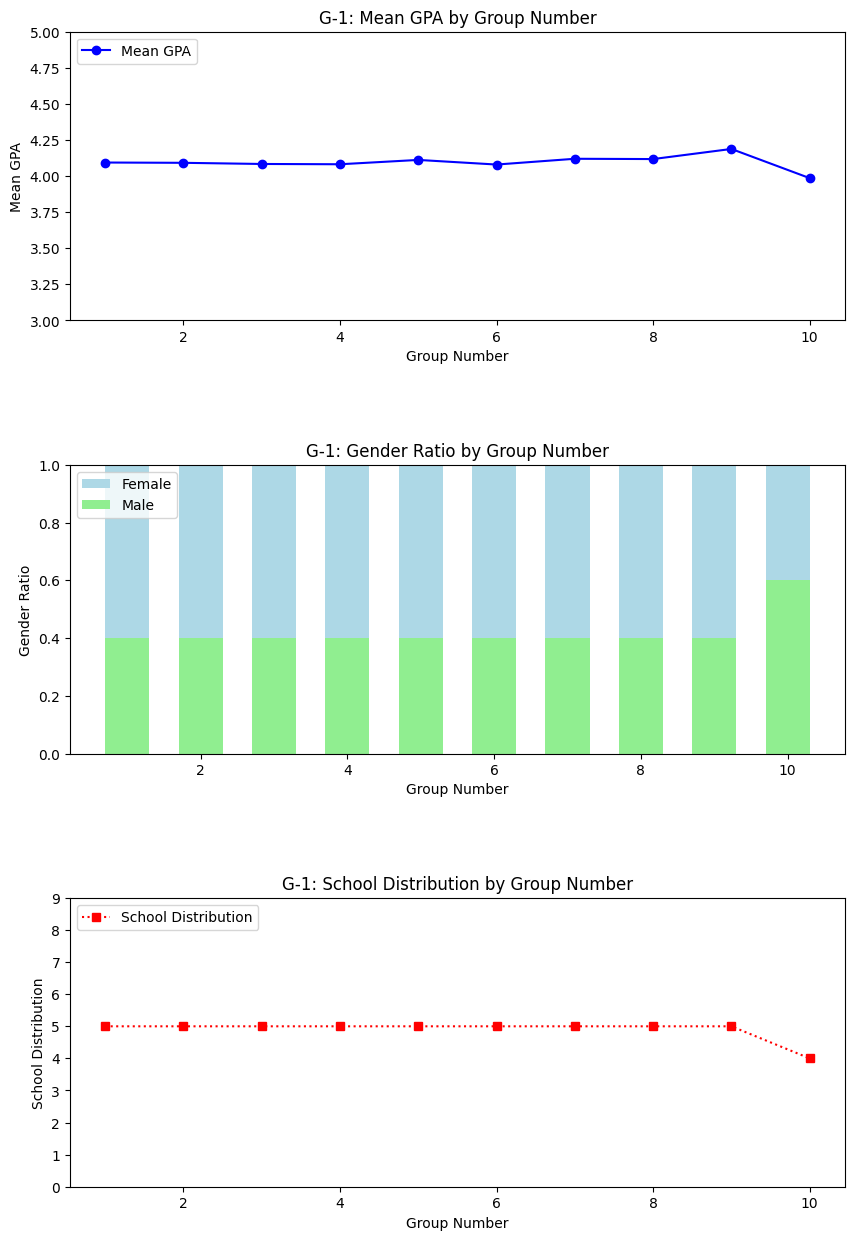

In [ ]:
# This function plots the analysed data into 3 graphs
def plot_data(tutorial_group):

    # Extract specific tutorial group's data (e.g., G-1, G-98) to plot
    tutorial_data = visualisation_data[tutorial_group]

    """
    Prepare Data for Plotting
    """
    # Initialise data to be plotted
    group_numbers = []
    mean_gpas = []
    males = []
    females = []
    school_distributions = []

    # Iterate through students in user-specified tutorial group, splitting each record's components into their respective lists
    for record in tutorial_data:
        # Prepare Group Numbers for plotting ([1, 2, 3, 4,..., 9, 10])
        group_numbers.append(record['group_number'])

        # Prepare Mean GPAs for plotting ([4.082, 4.112,..., 4.117])
        mean_gpas.append(record['mean_gpa'])

        # Prepare Male & Female Count for plotting ([0.4, 0.6,..., 0.4])
        males.append(record['gender_ratio']['Male'])
        females.append(record['gender_ratio']['Female'])

        # Prepare School Distributions for plotting ([5, 4,..., 5])
        school_distributions.append(record['school_distribution'])

    # Create a figure (fig) with 3 graphs (axs) on top of one another
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))

    """
    Plotting Mean GPA
    """

    # Setting graph type
    axs[0].plot(group_numbers, mean_gpas, color='blue', marker='o', label='Mean GPA')

    # Setting y-axis range, graph title and axis labels
    axs[0].set_ylim(3.0, 5.0)
    axs[0].set_title(f'{tutorial_group}: Mean GPA by Group Number')
    axs[0].set_ylabel('Mean GPA')
    axs[0].set_xlabel('Group Number')

    # Setting position of legend
    axs[0].legend(loc='upper left')

    """
    Plotting Gender Distribution
    """

    # Standardising width of bars
    width = 0.6

    # Setting graph type
    axs[1].bar(group_numbers, females, width=width, bottom=males, color='lightblue', label='Female')
    axs[1].bar(group_numbers, males, width=width, color='lightgreen', label='Male')

    # Setting y-axis range, graph title and axis labels
    axs[1].set_ylim(0.0, 1.0)
    axs[1].set_title(f'{tutorial_group}: Gender Ratio by Group Number')
    axs[1].set_ylabel('Gender Ratio')
    axs[1].set_xlabel('Group Number')

    # Setting position of legend
    axs[1].legend(loc='upper left')

    """
    Plotting School Distribution
    """
    # Setting graph type
    axs[2].plot(group_numbers, school_distributions, color='red', marker='s', linestyle=':', label='School Distribution')
    
    # Setting y-axis range, graph title and axis labels
    axs[2].set_ylim(0, 9)
    axs[2].set_title(f'{tutorial_group}: School Distribution by Group Number')
    axs[2].set_ylabel('School Distribution')
    axs[2].set_xlabel('Group Number')
    axs[2].legend(loc='upper left')

    # Adjusting layout and spacing between plots
    fig.subplots_adjust(hspace=0.5)
    plt.show()

# Plot data of user specified tutorial group
plot_data(tutorial_group_to_plot)


#### Export required/dependent packages needed onto a txt file

In [33]:
!pip freeze > requirements.txt

#### Declaration of the Use of AI Tools

![Declaration](assets/Declaration.png)